# Introduction

Anomaly detection is a machine learning technique used to identify patterns in data that do not conform to expected behavior. These unexpected patterns are referred to as anomalies or outliers. Anomalies may indicate errors or fraud in the data, or they may represent unusual or interesting phenomena that warrant further investigation. Anomaly detection can be applied to a wide range of domains, including finance, cybersecurity, medical diagnosis, and predictive maintenance. There are many different methods for detecting anomalies, such as statistical approaches, clustering algorithms, and deep learning models.

Some of the most popular methods for anomaly detection include Principal Component Analysis (PCA), K-Nearest Neighbors, Isolation Forest and Ensemble methods. One popular method of Deep Learning for anomaly detection is using **Autoencoders**, which are neural networks that learn to encode and decode data. Autoencoders can be trained on a dataset of normal, non-anomalous data, and then used to identify anomalies in new data that do not match the learned patterns. Evaluation of anomaly detection models can be challenging, as anomalies are often rare events and may not be well-represented in the training data. Common evaluation metrics include precision, recall, and F1-score, and cross-validation can be used to estimate model performance on unseen data.

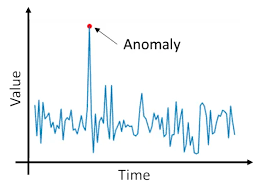

Anomaly detection is a powerful technique for identifying unexpected patterns in data and can provide valuable insights for many applications. However, it is important to carefully consider the limitations and assumptions of the chosen method, and to thoroughly evaluate the performance of the model on real-world data.

## Why not PCA?

Principal Component Analysis (PCA) is a dimensionality reduction technique used to transform high-dimensional data into a lower-dimensional space while retaining as much of the original variation as possible. It works by identifying the principal components of the data, which are the directions in which the data varies the most. These principal components are orthogonal to each other, and the first principal component captures the most variation in the data. PCA can also be used for anomaly detection. Anomalies in high-dimensional data can be difficult to detect due to the curse of dimensionality. PCA can be used to reduce the dimensionality of the data while retaining as much of the original variation as possible.

However, it's important to note that PCA assumes that the data is **linearly** related and that the principal components represent meaningful features. It may not be effective for highly nonlinear data or for data with complex relationships between the features. Additionally, PCA may not be effective for identifying rare anomalies if the normal pattern dominates the data.

## Say hello to - Autoencoders

Autoencoders are a type of neural network architecture that can be used for unsupervised learning, dimensionality reduction, and data compression. The goal of an autoencoder is to learn a compressed representation of the input data by encoding the input into a lower-dimensional representation, and then decoding the representation back into the original input.

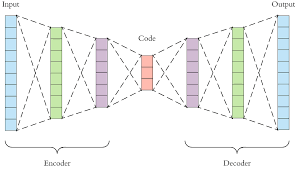

Autoencoders consist of three main components: an encoder, a hidden layer(CODE) and a decoder. The encoder maps the input data to a lower-dimensional representation, while the decoder maps the lower-dimensional representation back to the original input data. The hidden layer or Code, is the lower dimension representation of the input data. During training, the network learns to minimize the difference between the input and the reconstructed output, which encourages the network to learn a compressed representation of the input. One key benefit of autoencoders is their ability to capture complex patterns in the data, including **non-linear relationships** between the features. They can be used for a variety of applications, such as image compression, anomaly detection, and generating new data.

When training an **autoencoder for anomaly detection**, the goal is to learn a compressed representation of the normal data. This compressed representation should capture the typical patterns and relationships in the normal data, so that anomalies will be identified as data points that do not fit this pattern. Once the autoencoder has been trained on the normal data, we can use it to encode new data points and compare their reconstruction error to a threshold value. If the reconstruction error exceeds the threshold, the data point is considered an anomaly. By using the autoencoder in this way, we can identify anomalies in new data without having to explicitly label the anomalies in the training data.

<div class="alert alert-success" role="alert">
  <h3>In this Project:</h3>
    <ul>
        <li>EDA on Retail Transaction Datasets</li>
        <li>Building an Autoencoder model</li>
        <li>Evaluation and Testing of model for Classification of Fraud transacations</li>
    </ul>
</div>

# Setup

In [1]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn
!pip install tensorflow
!pip install kagglehub

In [5]:
import kagglehub
import os
import shutil

# Download latest version
dataset_path = kagglehub.dataset_download("dhanushnarayananr/credit-card-fraud")

# Create the destination directory if it doesn't exist
if not os.path.exists('/content/credit-card-fraud'):
    os.makedirs('/content/credit-card-fraud')

# Move the downloaded files to the destination directory
for file_name in os.listdir(dataset_path):
    shutil.move(os.path.join(dataset_path, file_name),
                os.path.join('/content/credit-card-fraud', file_name))

print("Path to dataset files:", "/content/credit-card-fraud")

Path to dataset files: /content/credit-card-fraud


In [6]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (12,9)
plt.rcParams['font.size'] = 10

from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, classification_report, confusion_matrix

import tensorflow as tf
from tensorflow.keras import Model, Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import mae
from tensorflow.keras.metrics import Mean
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Loading Data

In [7]:
df = pd.read_csv('/content/credit-card-fraud/card_transdata.csv')
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


### Shape of Dataset

In [9]:
print(f"Columns: {df.shape[1]}\nSamples: {df.shape[0]}")

Columns: 8
Samples: 1000000


### Checking for Null Values

In [10]:
any(df.isna().sum() > 0)

False

### Basic Statistics

In [11]:
df.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
cat_feats = [x for x in df.columns if len(df[x].unique()) <=2]
num_feats = [x for x in df.columns if x not in cat_feats]

# Exploratory Data Analysis

In [13]:
df['fraud'].value_counts()

,count
fraud,
0.0,912597
1.0,87403


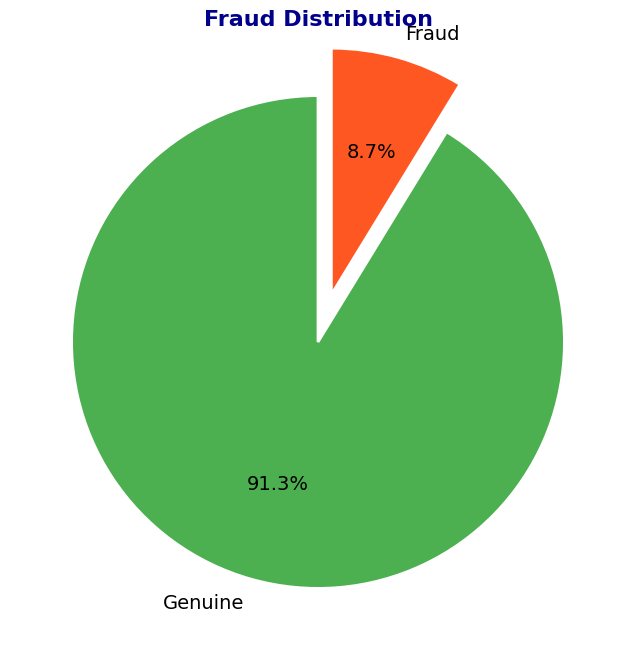

In [15]:
# Data
vc = df['fraud'].value_counts(ascending=False)

# Define colors and explode values for better visual separation
colors = ['#4CAF50', '#FF5722']  # Green for genuine, red for fraud
explode = [0.0, 0.2]  # Slightly separate the fraud slice

# Create the pie chart
plt.figure(figsize=(8, 8))  # Make the plot larger for better visibility
plt.pie(
    x=vc.values,
    labels=['Genuine', 'Fraud'],
    explode=explode,
    autopct='%1.1f%%',
    startangle=90,  # Rotate the pie for better alignment
    colors=colors,
    wedgeprops={'edgecolor': 'white', 'linewidth': 2},  # Add edge color for better slice separation
    textprops={'fontsize': 14, 'color': 'black'}  # Style the text
)

# Add a title
plt.title('Fraud Distribution', fontsize=16, color='darkblue', weight='bold')

# Show the plot
plt.show()


### Inferences
* The dataset is heavily **imbalanced**
* The autoencoders only require instances of `genuine` samples for training
* The `fraud` samples will be used for testing

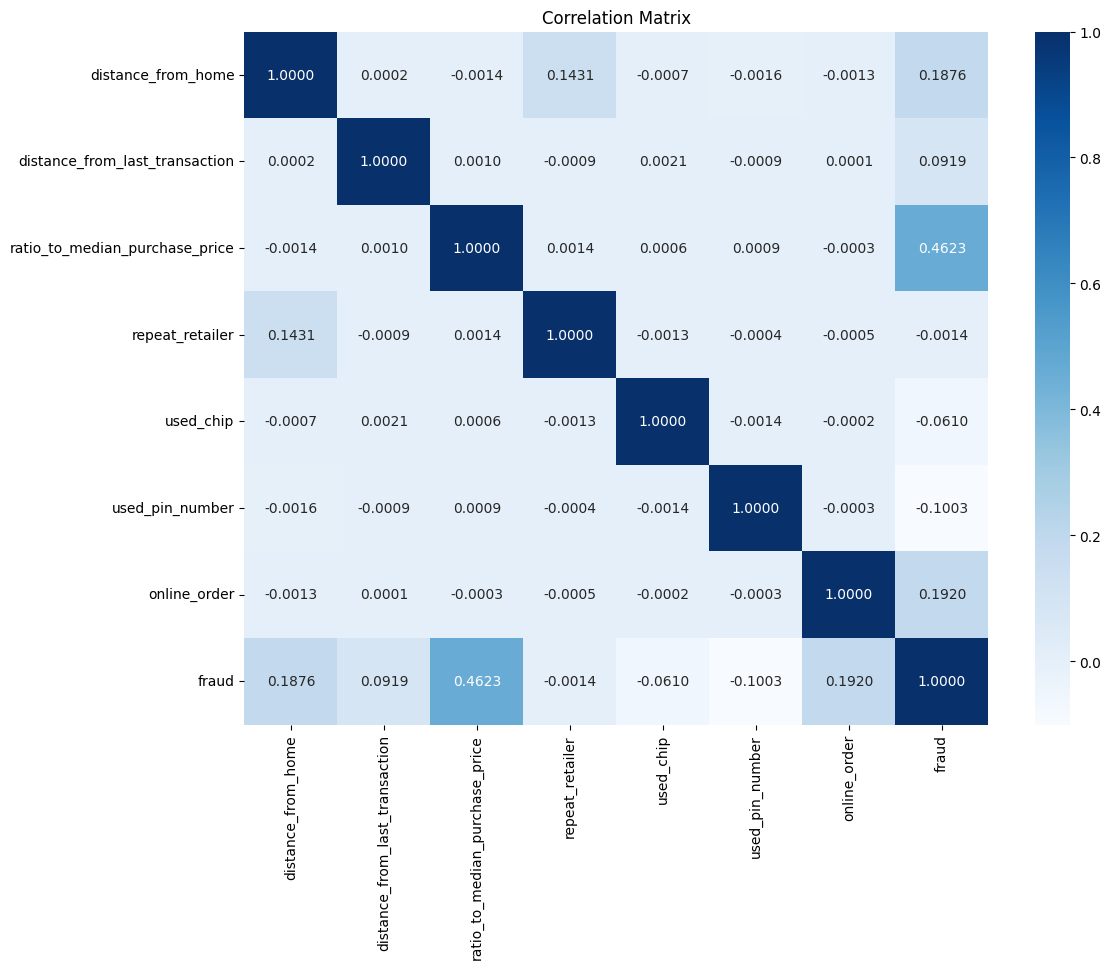

In [16]:
sns.heatmap(df.corr(), annot=True, fmt='.4f', cmap='Blues')
plt.title('Correlation Matrix')
plt.show()

### Inferences
* Weak Feature Correlation: The correlation matrix reveals that most features exhibit weak correlation, with values close to 0. This suggests that relationships between features are not strongly linear.
* Limitations of PCA: Principal Component Analysis (PCA) relies on linear relationships between features for effective dimensionality reduction. Given the weak correlation observed, PCA might not be the ideal approach for this dataset.
* Autoencoders for Complex Relationships: Autoencoders, being neural networks, excel at capturing complex, non-linear patterns in data. This makes them a more suitable choice for analyzing this dataset with its weakly correlated and potentially non-linear relationships.

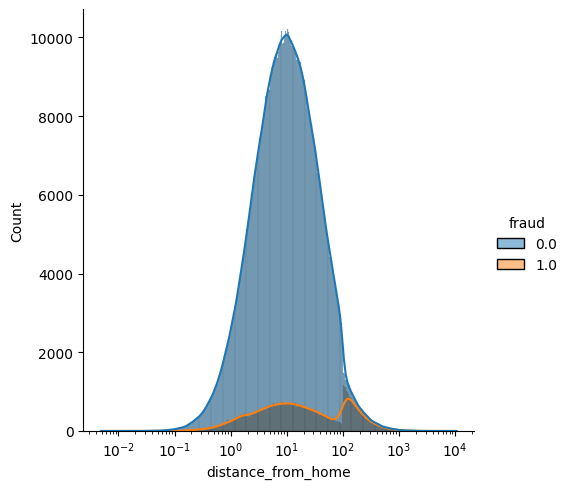

In [17]:
sns.displot(data=df, x='distance_from_home', hue='fraud', log_scale=True, kde=True)
plt.show()

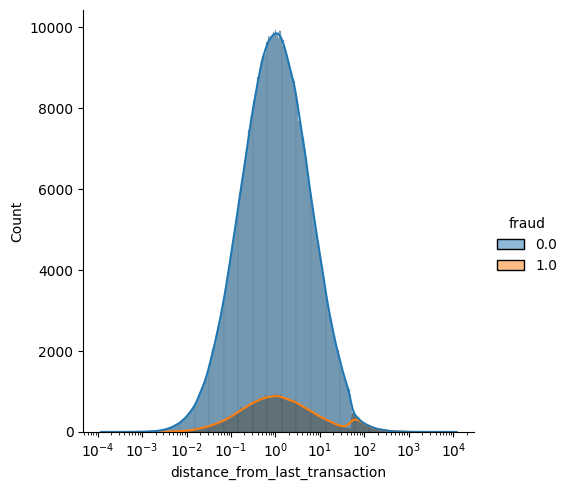

In [18]:
sns.displot(data=df, x='distance_from_last_transaction', hue='fraud', log_scale=True, kde=True)
plt.show()

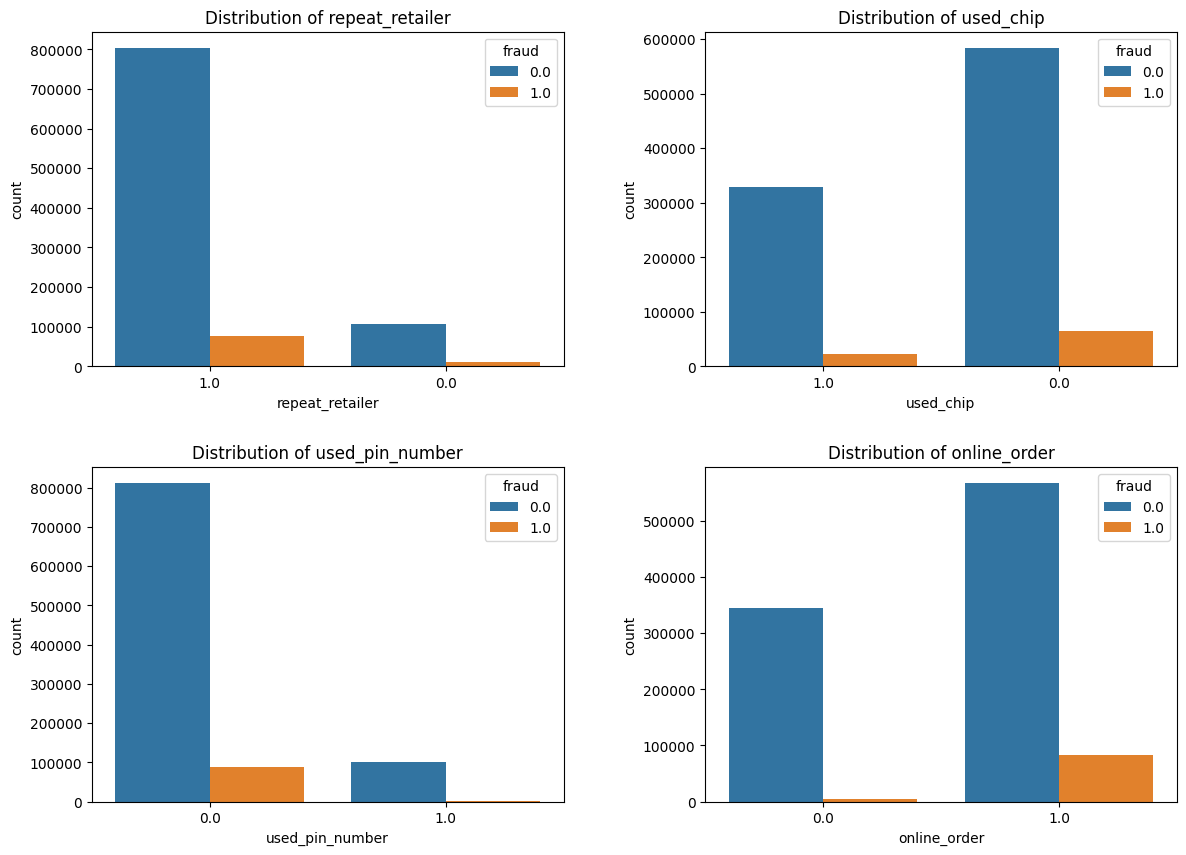

In [19]:
feats_to_plot = df.columns[3:-1]
plt.figure(figsize=(14,10))
for i, col in enumerate(feats_to_plot):
    plt.subplot(2,2,i+1)
    sns.countplot(x=df[col].astype(str), hue=df['fraud'])
    plt.title(f'Distribution of {col}')
plt.subplots_adjust(hspace=0.3, wspace=0.3)
plt.show()

# Feature Engineering

In [20]:
ct = make_column_transformer(
    (StandardScaler(), num_feats)
)

df_scaled = pd.DataFrame(ct.fit_transform(df), columns=num_feats)
df_cat_feats = df[cat_feats]

df_concat = pd.concat([df_scaled, df_cat_feats], axis=1)
df_concat.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,0.477882,-0.182849,0.043491,1.0,1.0,0.0,0.0,0.0
1,-0.241607,-0.188094,-0.189300,1.0,0.0,0.0,0.0,0.0
2,-0.329369,-0.163733,-0.498812,1.0,0.0,0.0,1.0,0.0
3,-0.372854,0.021806,-0.522048,1.0,1.0,0.0,1.0,0.0
4,0.268572,-0.172968,0.142373,1.0,1.0,0.0,1.0,0.0


#### Training with Normal Data
To effectively detect anomalies, the autoencoder is trained exclusively on `genuine` (non-anomalous) data. This allows the model to learn the typical patterns of normal behavior. Consequently, when encountering an anomaly, the model will produce a higher reconstruction error, signaling its deviation from the learned normal patterns. During testing, both genuine and fraudulent data are used to evaluate the model's performance in identifying anomalies.

In [21]:
X = df_concat.drop(['fraud'], axis=1)
y = df_concat['fraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=40)

y_train = y_train.astype(bool)
y_test = y_test.astype(bool)

X_train_genuine = X_train[~y_train]
X_test_genuine = X_test[~y_test]

X_train_fraud = X_train[y_train]
X_test_fraud = X_test[y_test]

# Model design - Autoencoder

| Component   | Description                                                                                                                                        |
|-------------|----------------------------------------------------------------------------------------------------------------------------------------------------|
| **Encoder** | One or more fully connected layers transform input data into a lower-dimensional representation. Hidden layers have fewer nodes to enable compression. Uses non-linear activation functions (e.g., sigmoid, ReLU) to capture complex relationships. |
| **Decoder** | Mirror image of the encoder with fully connected layers that reconstruct the compressed representation back into the original input space. Output layer matches the input layer size. Typically uses the same activation functions as the encoder.       |


In [22]:
CODE_DIM = 2
INPUT_SHAPE = X_train.shape[1]

input_layer = Input(shape=(INPUT_SHAPE,))
x = Dense(64, activation='relu')(input_layer)
x = Dense(16, activation='relu')(x)
code = Dense(CODE_DIM, activation='relu')(x)
x = Dense(16, activation='relu')(code)
x = Dense(64, activation='relu')(x)
output_layer = Dense(INPUT_SHAPE, activation='relu')(x)

autoencoder = Model(input_layer, output_layer, name='anomaly')

### Model Callbacks

In [24]:
model_name = "anomaly_detector.weights.h5" # Change the filename to include '.weights.h5'
checkpoint = ModelCheckpoint(model_name,
                            monitor="val_loss",
                            mode="min",
                            save_best_only = True,
                            save_weights_only=True,
                            verbose=1)
earlystopping = EarlyStopping(monitor='val_loss',
                              min_delta = 0,
                              patience = 5,
                              verbose = 1,
                              restore_best_weights=True)

callbacks = [checkpoint, earlystopping]

### Compilation

In [25]:
autoencoder.compile(loss='mae',
                    optimizer=Adam())

### Training

In [26]:
history = autoencoder.fit(X_train_genuine, X_train_genuine,
                          epochs=25, batch_size=64,
                          validation_data=(X_test, X_test),
                          callbacks=callbacks, shuffle=True)

Epoch 1/25
11401/11408 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2241
Epoch 1: val_loss improved from inf to 0.23721, saving model to anomaly_detector.weights.h5
11408/11408 ━━━━━━━━━━━━━━━━━━━━ 31s 3ms/step - loss: 0.2241 - val_loss: 0.2372
Epoch 2/25
11400/11408 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2146
Epoch 2: val_loss improved from 0.23721 to 0.23664, saving model to anomaly_detector.weights.h5
11408/11408 ━━━━━━━━━━━━━━━━━━━━ 37s 2ms/step - loss: 0.2146 - val_loss: 0.2366
Epoch 3/25
11386/11408 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2143
Epoch 3: val_loss improved from 0.23664 to 0.23658, saving model to anomaly_detector.weights.h5
11408/11408 ━━━━━━━━━━━━━━━━━━━━ 44s 2ms/step - loss: 0.2143 - val_loss: 0.2366
Epoch 4/25
11401/11408 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2145
Epoch 4: val_loss improved from 0.23658 to 0.23653, saving model to anomaly_detector.weights.h5
11408/11408 ━━━━━━━━━━━━━━━━━━━━ 28s 2ms/step - loss: 0.2145 - val_loss: 0.2365
Epoch 5/25
11377

### Results

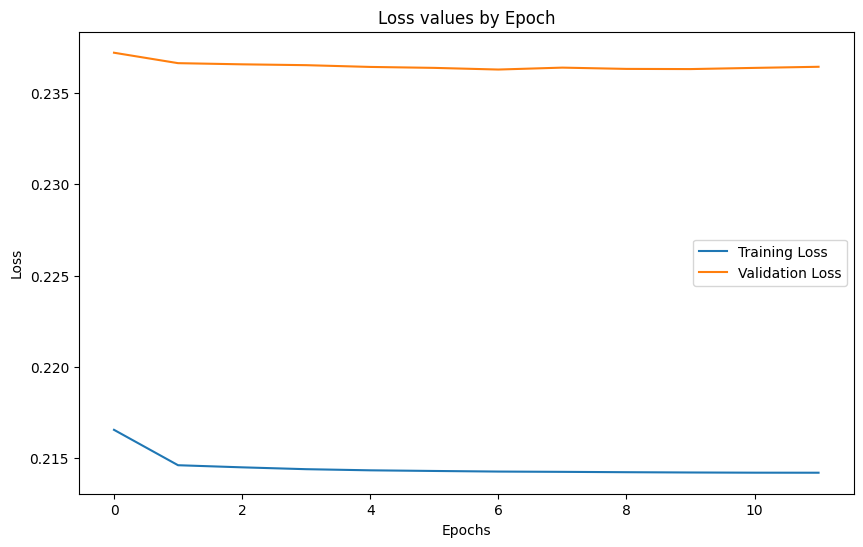

In [27]:
plt.figure(figsize=(10,6))
plt.plot(history.history['loss'], label="Training Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title("Loss values by Epoch")
plt.show()

### Reconstruction: Unveiling Anomalies
Reconstruction in the context of autoencoders involves using the learned compressed representation (the "code") to recreate the original input data. This recreation process is performed by the decoder part of the autoencoder. The autoencoder's primary objective is to learn a compressed representation that allows for accurate reconstruction of the input.

reconstruction

The difference between the original input (`x`) and the reconstructed output (`x`) is termed the Reconstruction Error. This error is central to anomaly detection.

How Reconstruction Error Detects Anomalies:

Prediction: The autoencoder is used to predict (`reconstruct`) the test data, which contains both genuine and fraudulent samples.
Threshold: A threshold value for the reconstruction error is established.
Classification:
If a sample's reconstruction error is below the threshold, it's classified as genuine.
If the reconstruction error exceeds the threshold, it's flagged as fraud.
This approach works because the autoencoder is trained solely on genuine data. Therefore, it becomes adept at reconstructing normal patterns. Any significant deviation from these patterns, resulting in a high reconstruction error, is considered an anomaly (`likely fraud in this case`).

In [28]:
reconstructions = autoencoder.predict(X_test, verbose=0)
reconstruction_error = mae(reconstructions, X_test)

### Create Dataframe with `reconstruction error` and `true` labels

In [29]:
recons_df = pd.DataFrame({
    'error': reconstruction_error,
    'y_true': y_test
}).reset_index(drop=True)
recons_df.head()

,error,y_true
0,0.115395,False
1,0.060556,False
2,0.302269,True
3,0.105599,False
4,0.291386,False


from matplotlib import pyplot as plt
_df_0['error'].plot(kind='hist', bins=20, title='error')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('y_true').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['error'].plot(kind='line', figsize=(8, 4), title='error')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_3['y_true'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_3, x='error', y='y_true', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

### Selecting the Optimal Threshold

Choosing the right threshold in anomaly detection with autoencoders is critical for balancing sensitivity to anomalies and minimizing false alarms. The threshold acts as the boundary for reconstruction error, above which a data point is flagged as anomalous. A low threshold may result in more false positives, misclassifying normal data as anomalies. On the other hand, a high threshold could miss actual anomalies, leading to false negatives.

For this task, Recall is the primary metric of interest, as reducing False Negatives is crucial. Misclassifying fraudulent transactions as genuine could allow significant issues to go undetected, compromising the system's reliability. To determine the optimal threshold, various percentile-based values of the reconstruction error will be tested, evaluating their impact on both Recall and overall accuracy. While the focus is on maximizing Recall, accuracy will also be monitored to ensure a balanced trade-off.


In [30]:
def thresholdTuning(df, iterations):

    thresh_df = {
        'threshold': [],
        'accuracy': [],
        'precision': [],
        'recall': []
    }

    for i in range(iterations):
        thresh_value = df['error'].quantile(i/iterations)
        preds = df['error'] > thresh_value
        cr = classification_report(df['y_true'], preds, output_dict=True)
        acc = cr['accuracy']
        prec = cr['macro avg']['precision']
        rc = cr['macro avg']['recall']

        thresh_df['threshold'].append(thresh_value)
        thresh_df['accuracy'].append(acc)
        thresh_df['precision'].append(prec)
        thresh_df['recall'].append(rc)

        print(f"Threshold: {thresh_value:.4f}\tAccuracy: {acc:.3f}\t\tPrecision: {prec:.3f}\tRecall Score: {rc:.3f}")

    return pd.DataFrame(thresh_df)

thresh_df = thresholdTuning(recons_df, 10)

Threshold: 0.0074	Accuracy: 0.087		Precision: 0.544	Recall Score: 0.500
Threshold: 0.0863	Accuracy: 0.187		Precision: 0.549	Recall Score: 0.555
Threshold: 0.1089	Accuracy: 0.287		Precision: 0.555	Recall Score: 0.610
Threshold: 0.1285	Accuracy: 0.387		Precision: 0.562	Recall Score: 0.664
Threshold: 0.1500	Accuracy: 0.487		Precision: 0.572	Recall Score: 0.717
Threshold: 0.2029	Accuracy: 0.573		Precision: 0.573	Recall Score: 0.729
Threshold: 0.2403	Accuracy: 0.657		Precision: 0.578	Recall Score: 0.735
Threshold: 0.2677	Accuracy: 0.746		Precision: 0.597	Recall Score: 0.755
Threshold: 0.2976	Accuracy: 0.834		Precision: 0.636	Recall Score: 0.772
Threshold: 0.4041	Accuracy: 0.890		Precision: 0.665	Recall Score: 0.687


In [31]:
threshold = thresh_df[thresh_df['recall'] == thresh_df['recall'].max()]['threshold'].values[0]
print(f"Threshold with Maximum Recall: {threshold:.6f}")

Threshold with Maximum Recall: 0.297625


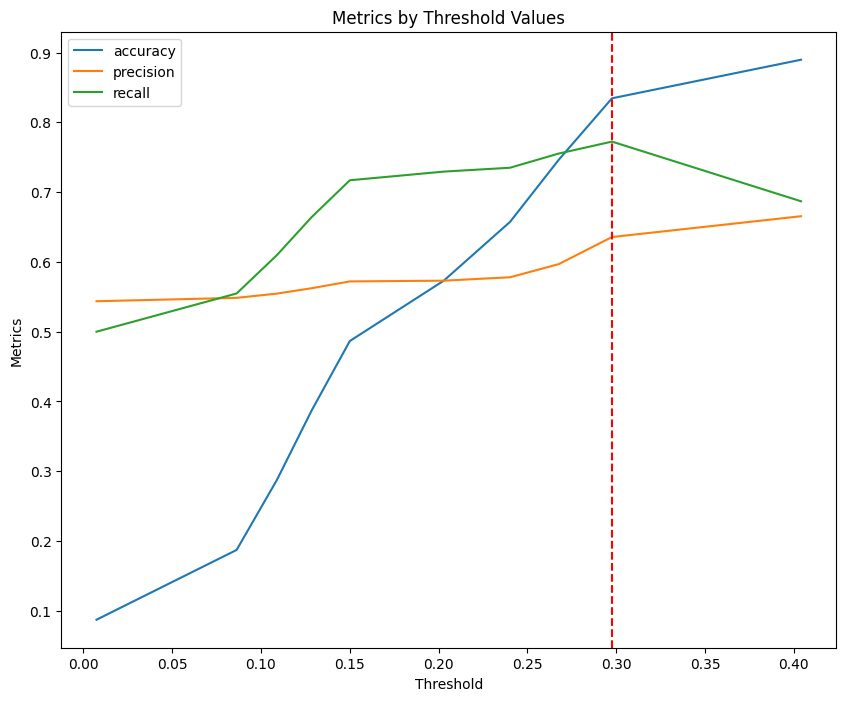

In [32]:
plt.figure(figsize=(10,8))
plt.plot(thresh_df['threshold'], thresh_df['accuracy'], label='accuracy')
plt.plot(thresh_df['threshold'], thresh_df['precision'], label='precision')
plt.plot(thresh_df['threshold'], thresh_df['recall'], label='recall')
plt.axvline(x=threshold, color='r', linestyle='dashed')
plt.xlabel('Threshold')
plt.ylabel('Metrics')
plt.title('Metrics by Threshold Values')
plt.legend()
plt.show()

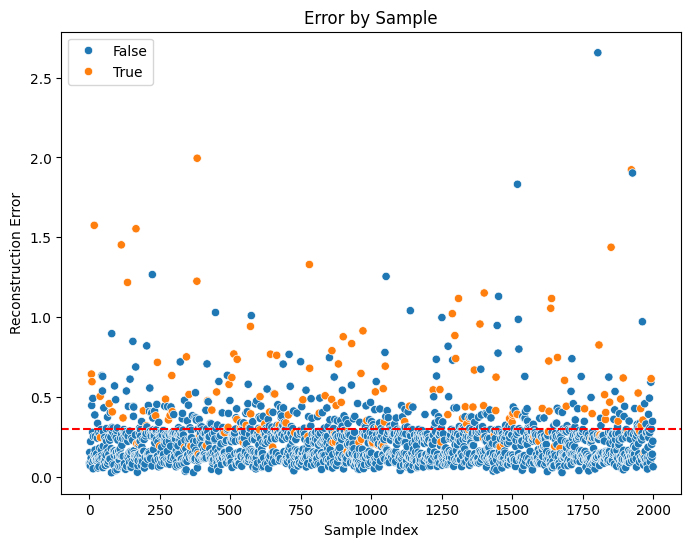

In [33]:
temp = recons_df.sample(frac=0.01, random_state=42).reset_index(drop=True)
plt.figure(figsize=(8,6))
sns.scatterplot(data=temp, x=temp.index, y='error', hue='y_true')
plt.axhline(y=threshold, color='r', linestyle='dashed')
plt.xlabel('Sample Index')
plt.ylabel('Reconstruction Error')
plt.title('Error by Sample')
plt.legend()
plt.show()

* The red dashed line indicates the established threshold for anomaly detection. For clarity, only a 1% sample of the testing data is visualized here. Observe that the majority of blue markers, representing genuine transactions, fall below the threshold. Conversely, above the threshold, a higher concentration of orange markers is seen, signifying potential fraudulent transactions

# Classification

In [40]:
recons_df['y_pred'] = recons_df['error'] > threshold
recons_df.head()

,error,y_true,y_pred
0,0.115395,False,False
1,0.060556,False,False
2,0.302269,True,True
3,0.105599,False,False
4,0.291386,False,False


In [39]:
print(classification_report(recons_df['y_true'],recons_df['y_pred']))

              precision    recall  f1-score   support

       False       0.97      0.85      0.90    182538
        True       0.30      0.70      0.42     17462

    accuracy                           0.83    200000
   macro avg       0.64      0.77      0.66    200000
weighted avg       0.91      0.83      0.86    200000



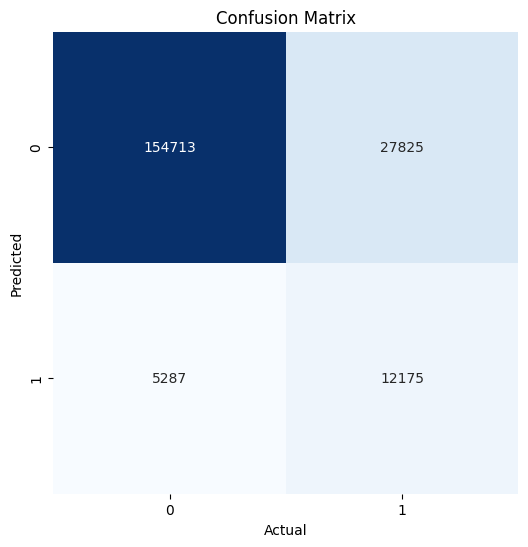

In [36]:
cm = confusion_matrix(recons_df['y_true'],recons_df['y_pred'])
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, cmap='Blues', cbar=False, fmt='.6g')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# Results

In [41]:
print(f"Recall Score: {recall_score(recons_df['y_true'],recons_df['y_pred'])*100:.3f}%")
print(f"Accuracy Score: {accuracy_score(recons_df['y_true'],recons_df['y_pred'])*100:.3f}%")

Recall Score: 69.723%
Accuracy Score: 83.444%


> ## Conclusion
> Anomaly detection plays a vital role across various industries such as finance, healthcare, and cybersecurity. Autoencoders have proven to be a powerful tool in this domain, offering the ability to compress data representations and generate precise reconstructions. By training on normal data and measuring reconstruction errors, autoencoders can effectively identify anomalies. However, selecting the right threshold for the reconstruction error is crucial to avoid false positives while still detecting true anomalies. In the end, autoencoders offer a promising and versatile solution for anomaly detection across diverse applications.
>
> **That's a wrap! Feel free to star the repo and leave feedback. Thank you!**
